In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# tuning for all plots
sns.set(font_scale = 2, style = 'whitegrid', rc = {'figure.figsize':(20,7)})

# set - change the default settings
# rc 'figure.figsize' - figure size


In [2]:
# Задание_№1
# Загрузите два датасета user_data и logs. Сколько уникальных значений принимает переменная platform?

user_data = pd.read_csv('C:/Users/aseno/Desktop/repositories/csv_files/3_user_data.csv')
logs      = pd.read_csv('C:/Users/aseno/Desktop/repositories/csv_files/3_logs.csv')

unique_platform_values = logs.platform.nunique()
unique_platform_values

3

In [3]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [4]:
user_data.shape

(2954, 3)

In [5]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [6]:
logs.shape

(4500, 4)

In [7]:
# Задание_№2
# Какой клиент совершил больше всего успешных операций?

success_clients    = logs.query('success == True').groupby('client').size() # counting successful transactions for each client

max_succes         = success_clients.max()  # find the maximum of successful operations

max_success_clients = success_clients.loc[success_clients == max_succes] # select the most successful clients
max_success_clients

client
12179    41
28719    41
36165    41
52870    41
61468    41
61473    41
78349    41
82563    41
92584    41
dtype: int64

In [60]:
# Задание_№3
# С какой платформы осуществляется наибольшее количество успешных операций?

the_best_platform = logs.query('success == True')\
                        .groupby('platform', as_index = False)\
                        .agg({'client':'count'})\
                        .rename(columns = {'client':'sucsessful'})\
                        .sort_values('sucsessful', ascending = False)\
                        .head(1)
the_best_platform

,platform,sucsessful
1,phone,2019


In [64]:
# Задание_№4
# Какая платформа наиболее популярна среди премиумных клиентов?

all_data = user_data.merge(logs, on = 'client') # combine data from both dataframes

premium_preference = all_data.query('premium == True')\
                            .groupby('platform', as_index = False)\
                            .agg({'client':'count'})\
                            .sort_values('client', ascending = False)\
                            .head(1)
premium_preference

,platform,client
1,phone,246


In [94]:
user_data.query('premium == True').age

22      27
23      25
24      35
29      20
51      24
        ..
2928    36
2930    66
2934    22
2947    50
2951    64
Name: age, Length: 406, dtype: int64

C:\Users\aseno\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aseno\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


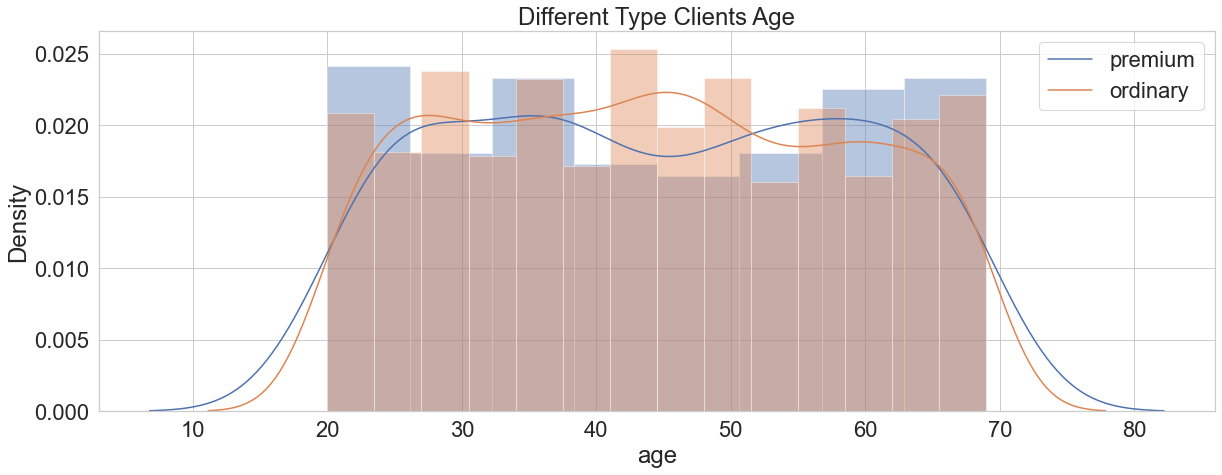

In [105]:
# Задание_№5
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
# используя библиотеку seaborn.

sns.distplot(x = user_data.query('premium == True').age)
sns.distplot(x = user_data.query('premium == False').age)

plt.xlabel("age")
plt.title("Different Type Clients Age")
plt.legend(labels=['premium','ordinary'])